*Name:* Jorge Eduardo Angarita Pérez

*Student Code:* 2248431

In this code, Levenberg-Marquard Method from 8.7 section is implemented

First, some libraries are imported.

In [1]:
import numpy as np                          # General numerical data processing
import matplotlib.pyplot as plt             # Plots

### Previous steps:

Function to optimize

In [2]:
def f_obj(x):
    y = (x[0] - 2)**4 + (x[0] - 2*x[1])**2
    return y

Plot the objective function with the analytical minimum for the following range of values:

Text(0, 0.5, '$x_2$')

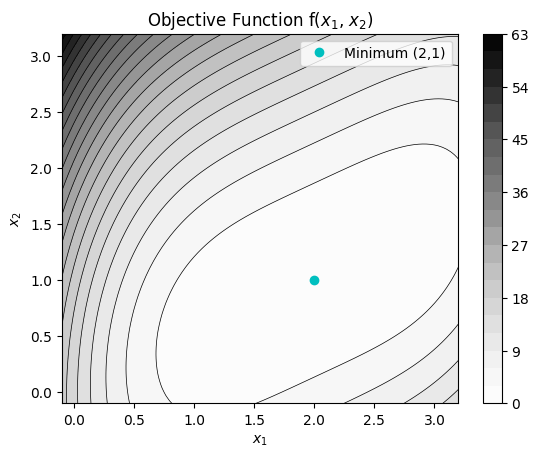

In [3]:
# Grid generation
x = np.linspace(-0.1, 3.2, 100)
y = np.linspace(-0.1, 3.2, 100)
X, Y = np.meshgrid(x, y)

# Function evaluation
Z = f_obj([X, Y])

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Let's continue with some required 1D functions:

In [4]:
# Single-Variable Derivatives

def deriv(f, x, delta):
    y = (f(x + delta) - f(x)) / delta
    return y

def Second_Deriv(f, x, delta):
    y = (f(x + 2*delta) -2*f(x + delta) + f(x)) / delta**2
    return y

# Newton search for 1D

def Newton_Search(f, current, epsilon):
    # Initialization (do While)
    Continue = True
    x = current
    delta = epsilon
    while Continue:
        # First derivative
        deriv_current = deriv(f, x, delta)
        # Second derivative
        deriv2nd_current = Second_Deriv(f, x, delta)
        # Next iteration value
        x_next = x - deriv_current / (deriv2nd_current + delta)
        # Finish flag
        Continue = (abs(x_next - x) > epsilon) & (abs(deriv_current) > epsilon)
        # Update value
        x = x_next
    return x_next

# Multi dimensional to 1-D
def gen_f_1d(f, xi, d):
    def f_1d(l):
        return f(xi + l*d)
    return f_1d

And their analog for multiple variable functions

In [7]:
# Multiple - Variable Derivatives

def Partial_deriv(f, x, index, delta):
    # Derivative usign forward difference equation
    x_delta = x.copy()

    # Increase/Decrease in the required coordinate
    x_delta[index] += delta
    return (f(x_delta) - f(x)) / delta

def Partial_2nd_Deriv(f, x, index, delta):
    x_delta_a  = x.copy()
    x_delta_b  = x.copy()
    x_delta_ab = x.copy()

    # Increase/Decrease in the required coordinate
    x_delta_a[index[0]]  += delta
    x_delta_b[index[1]]  += delta
    x_delta_ab[index[0]] += delta
    x_delta_ab[index[1]] += delta

    return (f(x_delta_ab) - f(x_delta_b) - f(x_delta_a) + f(x)) / (delta ** 2)

def Gradient(f, x, delta):
    grad = x.copy()
    for i in range(len(x)):
        grad[i] = Partial_deriv(f, x, i, delta)
    return grad

def Hessian(f, x, delta):
    n = len(x)
    Hessian = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            Hessian[i,j] = Partial_2nd_Deriv(f, x, [i,j], delta)
    return Hessian


### *8.8 Methods usign Conjugate Directions*

#### *i) Davidon-Fletcher-Powell*

In [10]:
def DFP(f, x_ini, epsilon, delta):
    # Initial values
    x = np.array(x_ini, dtype=float)
    n = len(x)
    grad_x = Gradient(f, x, delta)

    # Hessian matrix Approximation
    D_x = np.eye(n)

    # Number of iterations
    k = 1
    
    # History of each iterations
    history = [x.copy()]
    
    while True:
        # Stop criteria
        if(np.linalg.norm(Gradient(f, x, delta)) < epsilon):
            break

        for j in range(n):
            # Gradient at current point
            grad_x = Gradient(f, x, delta)
            
            # Direction is given by H_x and grad_x
            Dir = (-1) * np.dot(D_x, grad_x)
            
            # Define a new function for the i-th direction
            f_1d = gen_f_1d(f, x, Dir)

            # Optimize the function on this direction
            l_opt = Newton_Search(f_1d, 0, delta) # Initial l value equal to 0, then 
            
            # Update x_next value
            p = l_opt*Dir
            x_next = x + p
            
            if(j < n):
                q = Gradient(f, x_next, delta) - grad_x
                T1 = np.outer(p, p)/np.dot(q, p)
                T2 = np.outer(np.dot(q, D_x), np.dot(q, D_x))/np.dot(q, np.dot(D_x, q))
                D_x = D_x + T1 - T2

            # Update x value
            x = x_next

            # Save each update
            history.append(x.copy())

        # D_x reset every n steps
        D_x = np.eye(n)

        # Increase iterations counter
        k += 1

    print('\nDavidon Fletcher Powell Method:')
    print(f'Final Value = {x_next} \nIterations = {k}')

    return x_next, history

##### **_Testing_**


Davidon Fletcher Powell Method:
Final Value = [2.05319552 1.0266305 ] 
Iterations = 7


Text(0, 0.5, '$x_2$')

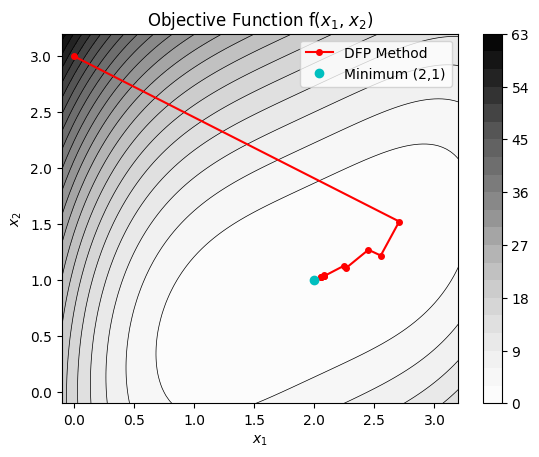

In [19]:
# Parameters for the algorithm
epsilon = 1E-3
delta = epsilon/100

# Run Optimization
x, DFP_History = DFP(f_obj, [0, 3], epsilon, delta)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

DFP_History = np.array(DFP_History)
plt.plot(DFP_History[:, 0], DFP_History[:, 1], 'ro-', markersize=4, 
         label="DFP Method")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

#### *ii) Broyden-Fletcher-Goldfarb-Shanno*

In [13]:
def BFGS(f, x_ini, epsilon, delta):
    # Initial values
    x = np.array(x_ini, dtype=float)
    n = len(x)
    grad_x = Gradient(f, x, delta)

    # Hessian matrix Approximation
    D_x = np.eye(n)

    # Number of iterations
    k = 1
    
    # History of each iterations
    history = [x.copy()]
    
    while True:
        # Stop criteria
        if(np.linalg.norm(Gradient(f, x, delta)) < epsilon):
            break

        for j in range(n):
            # Gradient at current point
            grad_x = Gradient(f, x, delta)
            
            # Direction is given by H_x and grad_x
            Dir = (-1) * np.dot(D_x, grad_x)
            
            # Define a new function for the i-th direction
            f_1d = gen_f_1d(f, x, Dir)

            # Optimize the function on this direction
            l_opt = Newton_Search(f_1d, 0, delta) # Initial l value equal to 0, then 
            
            # Update x_next value
            p = l_opt*Dir
            x_next = x + p
            
            if(j < n):
                q = Gradient(f, x_next, delta) - grad_x
                T1 = np.outer(p, p)*(1 + np.dot(q, np.dot(D_x, q))/np.dot(p, q))
                T2 = np.dot(D_x, np.dot(q, p)) + np.dot(np.dot(p, q), D_x)
                D_x = D_x + (T1 - T2)/np.dot(p, q)
                
        
            # Update x value
            x = x_next

            # Save each update
            history.append(x.copy())

        # D_x reset every n steps
        D_x = np.eye(n)

        # Increase iterations counter
        k += 1

    print('\nBroyden-Fletcher-Goldfarb-Shanno Method:')
    print(f'Final Value = {x_next} \nIterations = {k}')

    return x_next, history

##### **_Testing_**


Broyden-Fletcher-Goldfarb-Shanno Method:
Final Value = [2.06368877 1.03189705] 
Iterations = 54


Text(0, 0.5, '$x_2$')

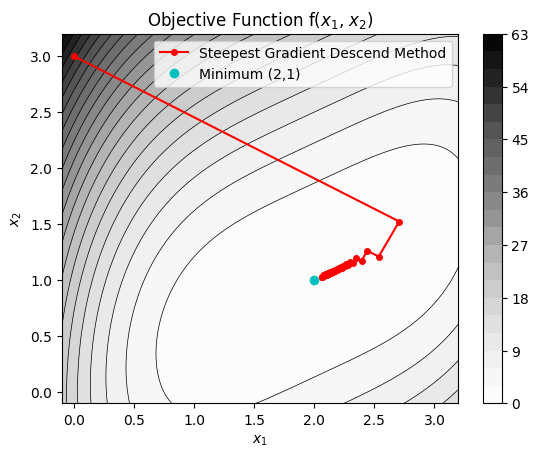

In [15]:
# Parameters for the algorithm
epsilon = 1E-3
delta = epsilon/100

# Run Optimization
x, BFGS_History = BFGS(f_obj, [0, 3], epsilon, delta)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

BFGS_History = np.array(BFGS_History)
plt.plot(BFGS_History[:, 0], BFGS_History[:, 1], 'ro-', markersize=4, 
         label="BFGS Method")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

#### *iii) Fletcher-Reeves*

In [17]:
def FlRe(f, x_ini, epsilon, delta):
    # Initial values
    x = np.array(x_ini, dtype=float)
    n = len(x)

    # Number of iterations
    k = 1
    
    # History of each iterations
    history = [x.copy()]
    
    while True:
        # Gradient at current point
        grad_x = Gradient(f, x, delta)

        # Stop criteria
        if(np.linalg.norm(grad_x) < epsilon):
            break

        # Direction is given by H_x and grad_x
        Dir = (-1) * grad_x

        for j in range(n):
            
            # Define a new function for the i-th direction
            f_1d = gen_f_1d(f, x, Dir)

            # Optimize the function on this direction
            l_opt = Newton_Search(f_1d, 0, delta) # Initial l value equal to 0, then 
            
            # Update x_next value
            x_next = x + l_opt*Dir
            
            if(j < n):
                grad_x_next = Gradient(f, x_next, delta)
                alpha = np.linalg.norm(grad_x_next)**2/np.linalg.norm(grad_x)**2
                Dir = (-1)*grad_x_next + alpha*Dir
        
            # Update x value
            x = x_next
            
            # Save each update
            history.append(x.copy())

        # Increase iterations counter
        k += 1

    print('\nFletcher-Reeves Method:')
    print(f'Final Value = {x_next} \nIterations = {k}')

    return x_next, history

##### **_Testing_**


Fletcher-Reeves Method:
Final Value = [2.06223524 1.03111269] 
Iterations = 32


Text(0, 0.5, '$x_2$')

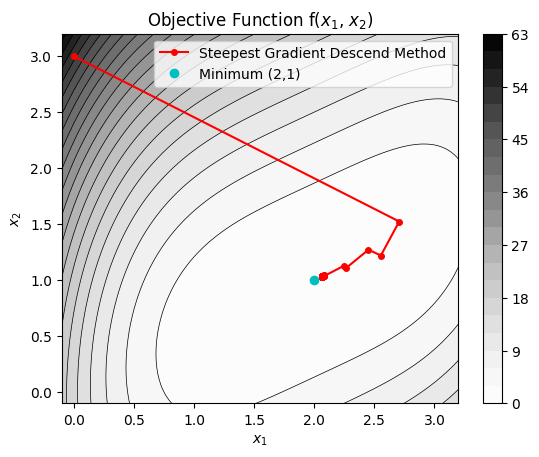

In [18]:
# Parameters for the algorithm
epsilon = 1E-3
delta = epsilon/100

# Run Optimization
x, FlRe_History = FlRe(f_obj, [0, 3], epsilon, delta)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

FlRe_History = np.array(FlRe_History)
plt.plot(FlRe_History[:, 0], FlRe_History[:, 1], 'ro-', markersize=4, 
         label="Fletcher-Reeves Method")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')